In [88]:
## Build Xrefs
import networkx as nx
import matplotlib.pyplot as plt
from pymongo import MongoClient
from collections import Counter
import seaborn as sns
from pprint import pprint
%matplotlib inline

In [3]:
g = nx.Graph()
client = MongoClient()

- **CTDBase**: Disease -> GO, pathways, chemicals, genes (not done)
 - IDs: MESH or OMIM
 - xref: None
- **Disease ontology**: Disease -> Disease
 - IDs: DOID
 - xref: (many. most common in order:) SNOMEDCT_US_2016_03_01, UMLS_CUI, NCI, OMIM, ICD10CM, MESH, ICD9CM, ORDO, EFO, CSP, KEGG
- **DisGeNet**: Disease -> genes
 - IDs: umls
 - xref: None
- **HPO** (human phenotype ontology): Phenotypes/symptoms
 - IDs: HP
 - xref: UMLS, MESH, SNOMEDCT, MEDDRA, ICD-10
- **HPO** (clinical annotations): Disease -> phenotypes
 - IDs: OMIM, ORPHANET, DECIPHER
 - xref: None
- **MESH**: Disease -> Disease
 - IDs: MESH
 - xref: None
- **OMIM**: Not sure if license allows use
 - IDs: OMIM
 - xref: None
- **Orphanet** (ORDO): Disease -> Disease
 - IDs: Orphanet
 - xref: OMIM, ICD-10, UMLS, MESH, MedDRA


## to do

- UMLS
- uniprot diseases (disease -> protein)
- medgen?
- GTR? ftp://ftp.ncbi.nlm.nih.gov/pub/GTR/_README.html (genetic tests)
- clinvar (variants associated with disease)
- kegg
- wormbase & mouse genome informatics (model systems)


http://www.ebi.ac.uk/gene2phenotype/downloads/DDG2P.csv.gz
Development Disorder Genotype – Phenotype Database (DDG2P)  – a curated list of genes reported to be associated with developmental disorders, compiled by clinicians as part of the DDD study to facilitate clinical feedback of likely causal variants. Please note: This file is maintained by the European Bioinformatics Institute. Its contents may differ from DECIPHER due to different update cycles. 

In [4]:
## Ordo / orphanet
db = client.mydisease.orphanet
for doc in db.find({'xref':{'$exists': True}},{'xref':1}):
    for xref in doc['xref']:
        g.add_edge(doc['_id'],xref)

In [5]:
## disease ontology
db = client.mydisease.DO
for doc in db.find({'xref':{'$exists': True}},{'xref':1}):
    for xref in doc['xref']:
        g.add_edge(doc['_id'],xref)

In [7]:
## human phenotype ontology
db = client.mydisease.HPO
for doc in db.find({'xref':{'$exists': True}},{'xref':1}):
    for xref in doc['xref']:
        g.add_edge(doc['_id'],xref)

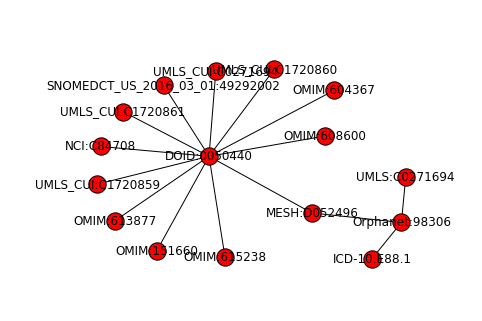

In [8]:
gg = nx.ego_graph(g, 'MESH:D052496', radius=2, center=True, undirected=True)
nx.draw_spring(gg, with_labels=True)

{'DOID:0050440': <matplotlib.text.Text at 0x7efe8eabe160>,
 'ICD-10:E88.1': <matplotlib.text.Text at 0x7efe8eabe6a0>,
 'MESH:D052496': <matplotlib.text.Text at 0x7efe8eafcbe0>,
 'OMIM:151660': <matplotlib.text.Text at 0x7efe8f0fabe0>,
 'OMIM:604367': <matplotlib.text.Text at 0x7efe8eabebe0>,
 'OMIM:608600': <matplotlib.text.Text at 0x7efe8eafc160>,
 'OMIM:613877': <matplotlib.text.Text at 0x7efe8f0d36a0>,
 'OMIM:615238': <matplotlib.text.Text at 0x7efe8f0d3128>,
 'Orphanet:98306': <matplotlib.text.Text at 0x7efe9681eb38>,
 'UMLS:C0271694': <matplotlib.text.Text at 0x7efe8f0fa6a0>,
 'UMLS_CUI:C0271694': <matplotlib.text.Text at 0x7efe8f0fa160>,
 'UMLS_CUI:C1720859': <matplotlib.text.Text at 0x7efe8f0d3be0>,
 'UMLS_CUI:C1720861': <matplotlib.text.Text at 0x7efe8eafc6a0>}

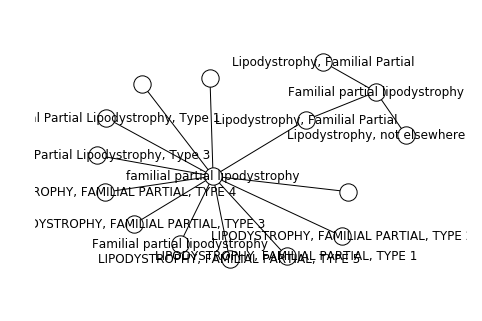

In [10]:
# https://monarchinitiative.org/disease/DOID:0050440
labels = {'MESH:D052496': 'Lipodystrophy, Familial Partial',
         'ICD-10:E88.1': 'Lipodystrophy, not elsewhere classified',
         'Orphanet:98306': 'Familial partial lipodystrophy',
         'UMLS:C0271694': 'Lipodystrophy, Familial Partial',
         'DOID:0050440': 'familial partial lipodystrophy',
         'OMIM:151660': 'LIPODYSTROPHY, FAMILIAL PARTIAL, TYPE 2',
         'OMIM:604367': 'LIPODYSTROPHY, FAMILIAL PARTIAL, TYPE 3',
         'OMIM:615238': 'LIPODYSTROPHY, FAMILIAL PARTIAL, TYPE 5',
         'OMIM:613877': 'LIPODYSTROPHY, FAMILIAL PARTIAL, TYPE 4',
         'OMIM:608600': 'LIPODYSTROPHY, FAMILIAL PARTIAL, TYPE 1',
         'UMLS_CUI:C1720859': 'Familial Partial Lipodystrophy, Type 1',
         'UMLS_CUI:C0271694': 'Familial partial lipodystrophy',
         'UMLS_CUI:C1720861': 'Familial Partial Lipodystrophy, Type 3'}
pos = nx.spring_layout(gg)
nx.draw(gg,pos,node_color='w')
nx.draw_networkx_labels(gg, pos, labels=labels)

In [11]:
db = client.mydisease.orphanet
db.find_one('Orphanet:280356')

{'_id': 'Orphanet:280356',
 'alternative_term': ['PLIN1-related FPLD', 'FPLD4'],
 'parents': ['Orphanet:377788'],
 'part_of': ['Orphanet:98306', 'Orphanet:181368'],
 'preferred_label': 'PLIN1-related familial partial lipodystrophy',
 'synonyms': ['PLIN1-related FPLD', 'FPLD4'],
 'tree_view': ['Orphanet:98306', 'Orphanet:181368'],
 'xref': ['OMIM:613877', 'ICD-10:E88.1']}

### A CC subgraph with two DO IDs

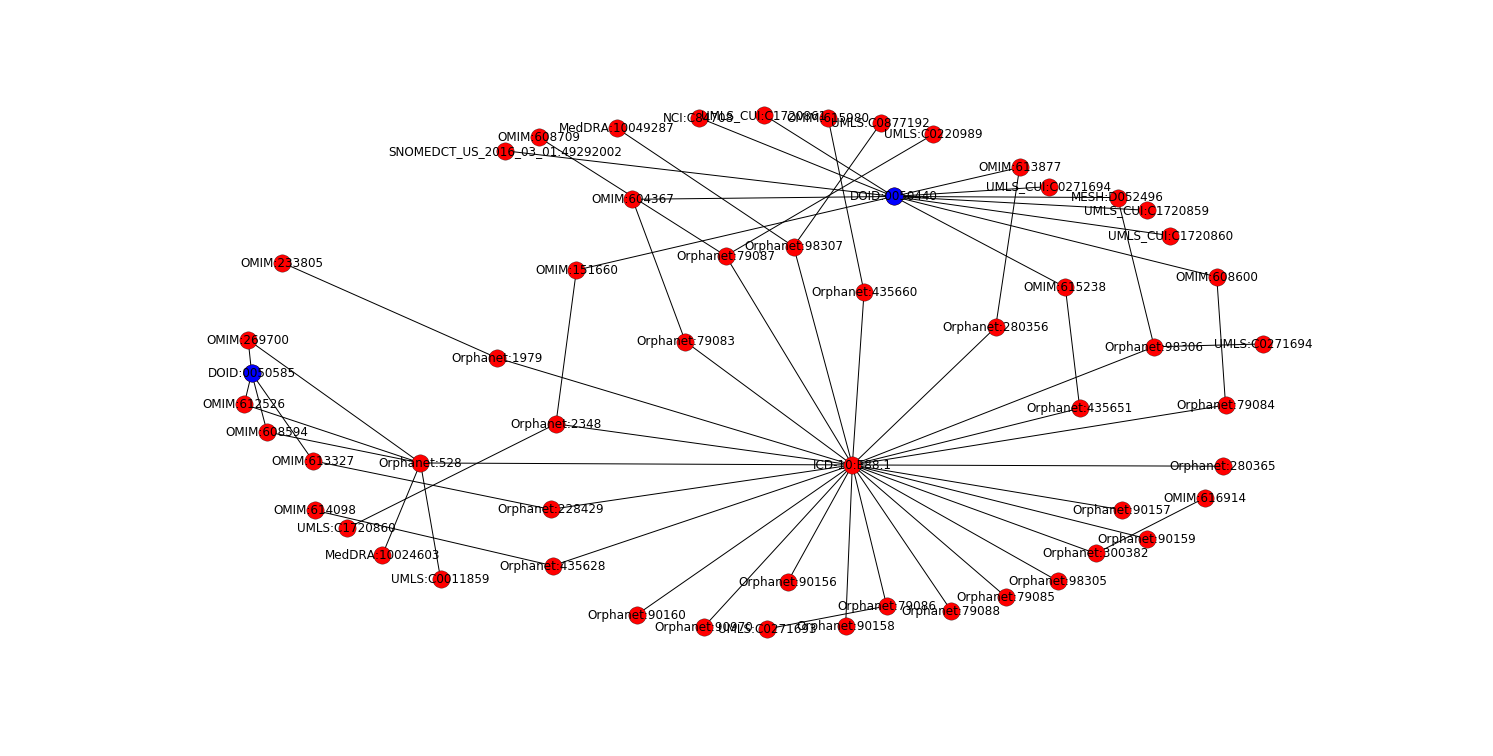

In [120]:
plt.figure(figsize=(20,10))
gg = nx.ego_graph(g, 'MESH:D052496', radius=1000, center=True, undirected=True)
pos = nx.layout.fruchterman_reingold_layout(gg)
nx.draw(gg, pos, with_labels=True)
do_ids = [x for x in gg.nodes() if x.startswith("DOID:")]
nx.draw_networkx_nodes(gg,pos,nodelist=do_ids,node_color='b')

In [121]:
# DO names
db = client.mydisease.DO
print([x['name'] for x in db.find({'_id':{'$in': do_ids}},{'name':1,'preferred_label':1})])

['familial partial lipodystrophy', 'congenital generalized lipodystrophy']


In [122]:
paths = list(nx.shortest_paths.all_shortest_paths(gg, do_ids[0], do_ids[1]))
print("number of different shortest paths between the two DOIDs")
print(len(paths))

number of different shortest paths between the two DOIDs
24


{'DOID:0050440': <matplotlib.text.Text at 0x7efe7516d4a8>,
 'DOID:0050585': <matplotlib.text.Text at 0x7efe7516a3c8>,
 'ICD-10:E88.1': <matplotlib.text.Text at 0x7efe7516d908>,
 'MESH:D052496': <matplotlib.text.Text at 0x7efe7516de48>,
 'OMIM:613327': <matplotlib.text.Text at 0x7efe75193f28>,
 'Orphanet:228429': <matplotlib.text.Text at 0x7efe7516a908>,
 'Orphanet:98306': <matplotlib.text.Text at 0x7efe75193400>}

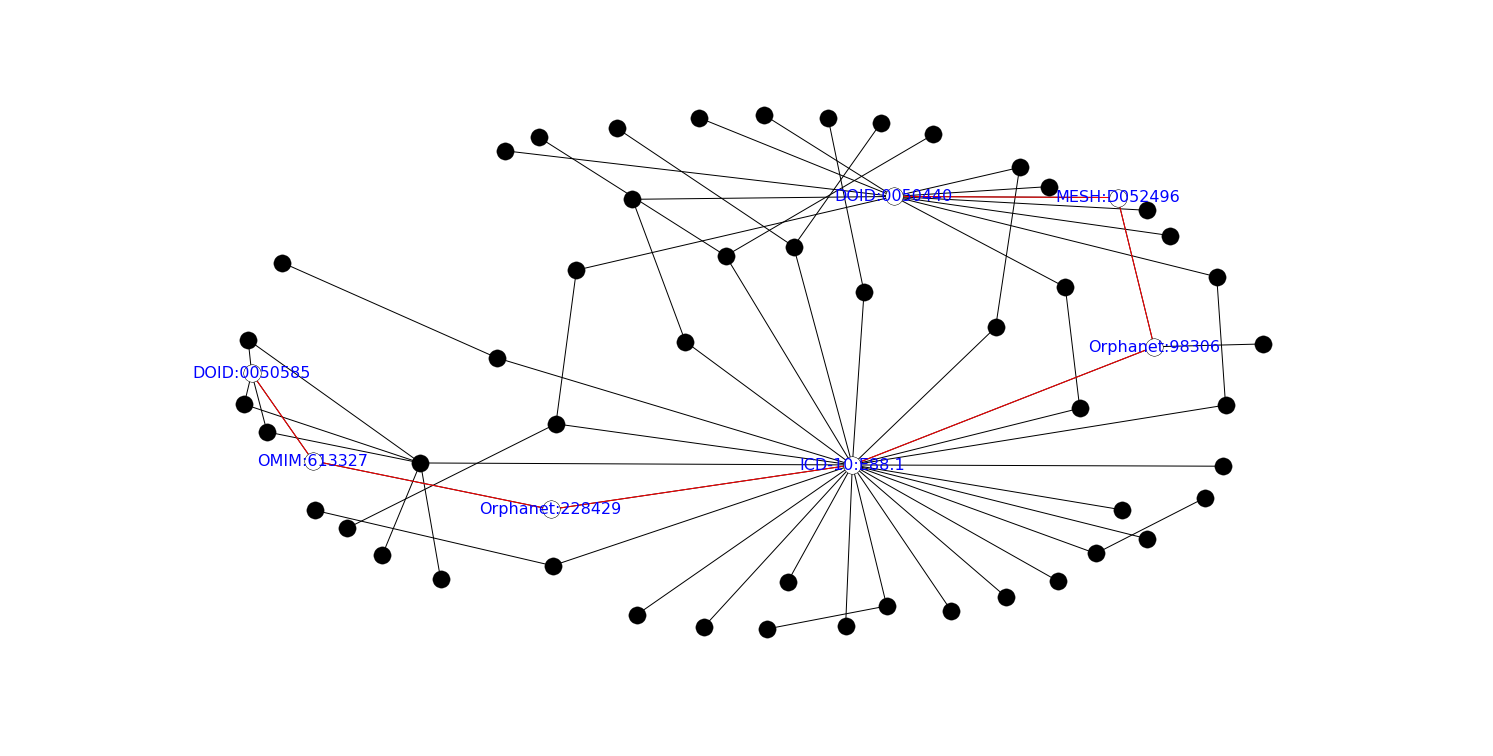

In [123]:
# Draw one of the paths
path = paths[0]
plt.figure(figsize=(20,10))
nx.draw(gg, pos,node_color='k')
path_edges = list(zip(path,path[1:]))
nx.draw_networkx_edges(gg,pos,edgelist=path_edges,edge_color='r')
nx.draw_networkx_nodes(gg,pos,nodelist=path,node_color='w')
labels = {node:node for node in gg.nodes() if node in path}
nx.draw_networkx_labels(gg, pos, labels=labels, font_size=16,font_color='b')

### Look at all connected component subgraphs

In [75]:
ccs = nx.connected_component_subgraphs(g)
print("number of cc subgraphs: ")
print(len(list(ccs)))

number of cc subgraphs: 
8795


In [80]:
ccs = list(nx.connected_component_subgraphs(g))
print("Count of number of DO IDs in each ccs")
print(Counter([len([x for x in subgraph.nodes() if x.startswith("DOID:")]) for subgraph in ccs]))

Count of number of DO IDs in each ccs
Counter({0: 4254, 1: 4093, 2: 250, 3: 87, 4: 42, 5: 18, 6: 11, 9: 8, 11: 7, 7: 5, 8: 5, 12: 4, 17: 3, 19: 2, 172: 1, 10: 1, 13: 1, 14: 1, 16: 1, 595: 1})


### Of CCS with 0 DO IDs, how large are the subgraphs?

In [105]:
print(Counter([len(subgraph) for subgraph in ccs if len([x for x in subgraph.nodes() if x.startswith("DOID:")])==0]))

Counter({2: 2989, 3: 659, 4: 285, 5: 124, 6: 55, 7: 28, 10: 23, 8: 20, 9: 13, 11: 9, 12: 8, 13: 8, 16: 6, 15: 5, 17: 4, 14: 2, 22: 2, 27: 2, 18: 1, 20: 1, 21: 1, 23: 1, 24: 1, 25: 1, 26: 1, 31: 1, 32: 1, 35: 1, 42: 1, 43: 1})


In [109]:
# look at the largest one?
sg = [subgraph for subgraph in ccs if len([x for x in subgraph.nodes() if x.startswith("DOID:")])==0 and len(subgraph)==43][0]
db = client.mydisease.orphanet
print("orphanet names")
print([x['preferred_label'] for x in db.find({'_id':{'$in': gg.nodes()}},{'name':1,'preferred_label':1})])

orphanet names
['Hereditary neurocutaneous angioma', 'Tufted angioma', 'Laryngotracheal angioma', 'Primary intraosseous vascular malformation', 'Non-involuting congenital hemangioma', 'Rapidly involuting congenital hemangioma', 'Epithelioid hemangioendothelioma', 'Pulmonary capillary hemangiomatosis', 'Spindle cell hemangioma', 'Giant infantile hemangioma', 'Kaposiform hemangioendothelioma', 'Cavernous hemangiomas of face-supraumbilical midline raphe syndrome', 'Kasabach-Merritt syndrome', 'Congenital liver hemangioma', 'Transverse limb deficiency-hemangioma syndrome', 'Glomus tumor', 'Retinal cavernous hemangioma', 'Familial capillary hemangioma']


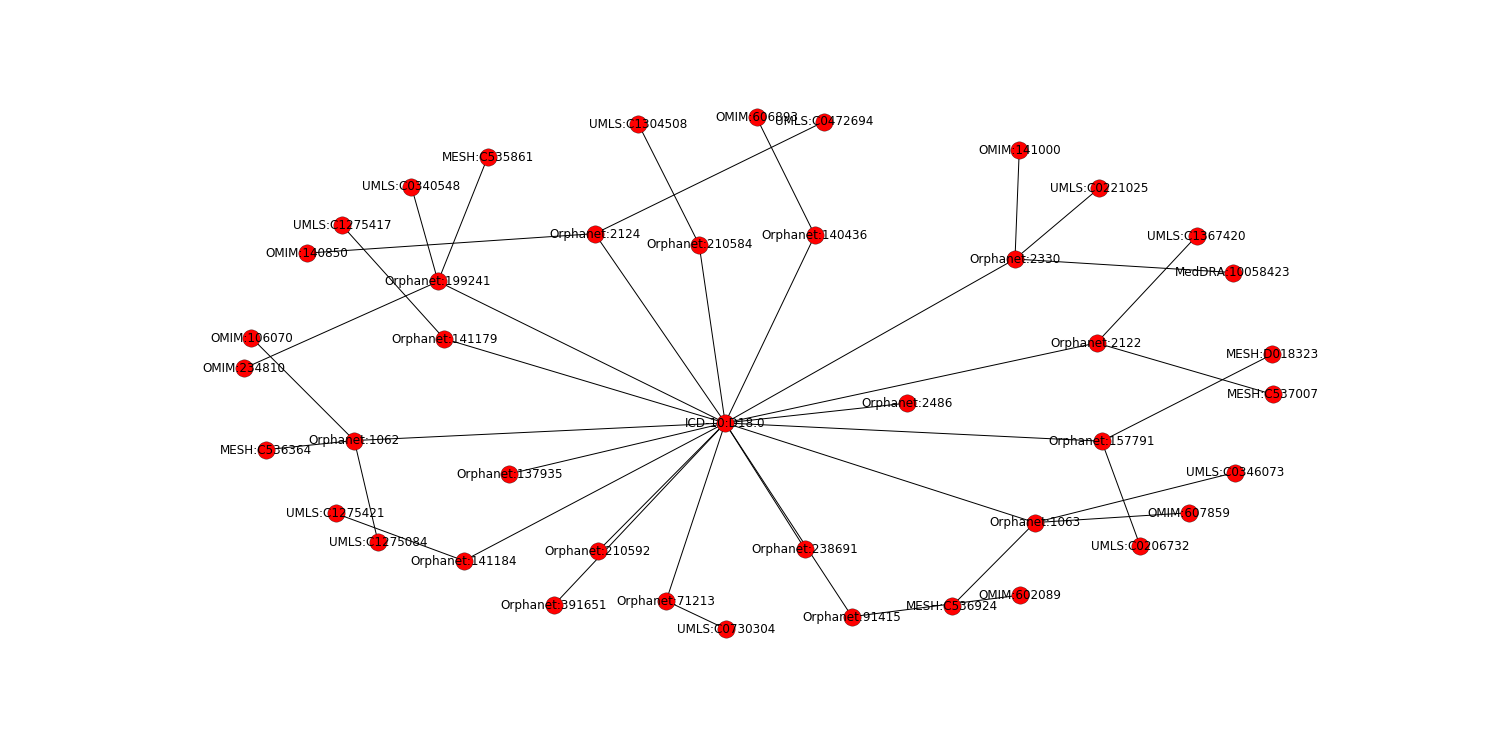

In [110]:
plt.figure(figsize=(20,10))
pos = nx.spring_layout(sg)
nx.draw(sg, pos, with_labels=True)

### CC with 4 DO IDs

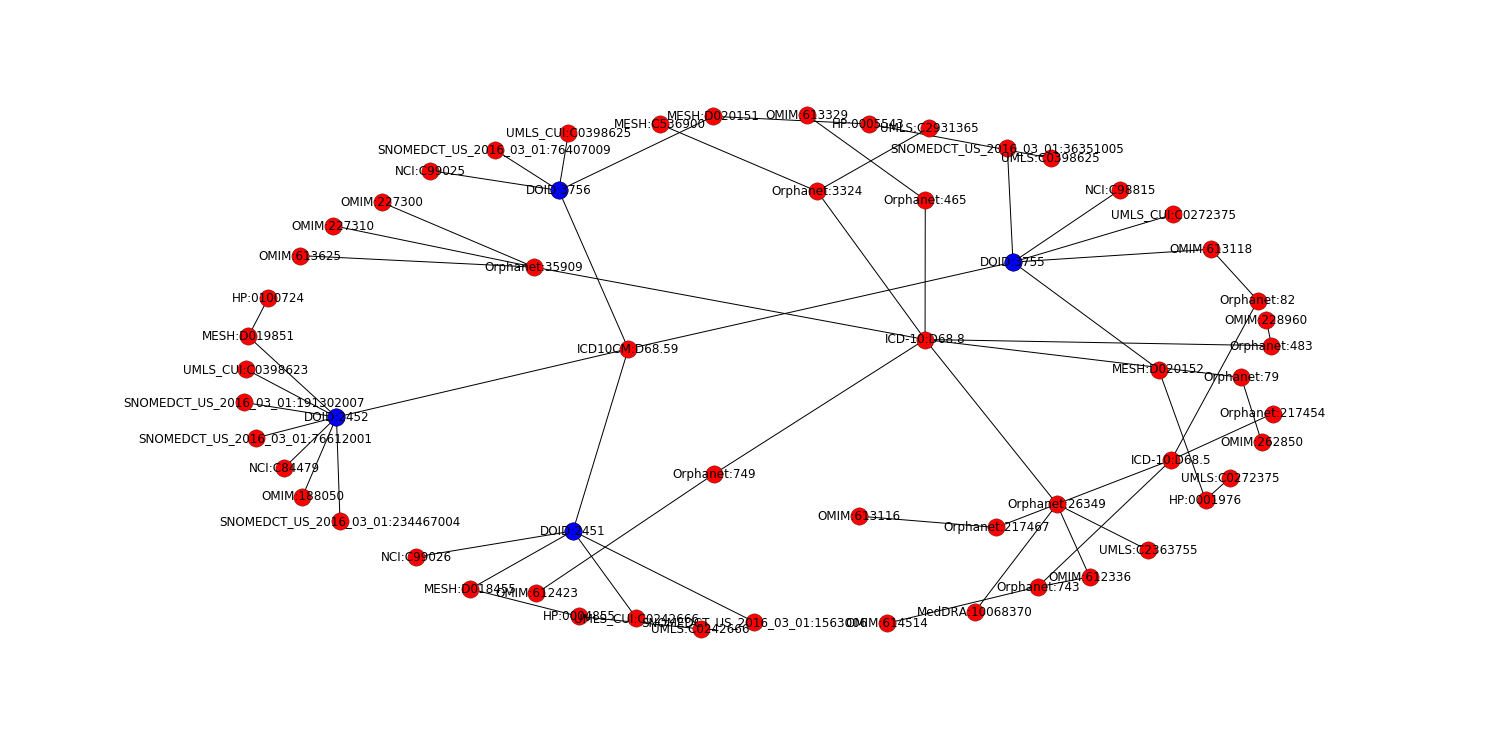

In [138]:
sg = [subgraph for subgraph in ccs if len([x for x in subgraph.nodes() if x.startswith("DOID:")])==4 and len(subgraph)>20][0]
plt.figure(figsize=(20,10))
pos = nx.layout.fruchterman_reingold_layout(sg)
nx.draw(sg, pos, with_labels=True)
do_ids = [x for x in sg.nodes() if x.startswith("DOID:")]
nx.draw_networkx_nodes(sg,pos,nodelist=do_ids,node_color='b')

### CC with 5 DO IDs

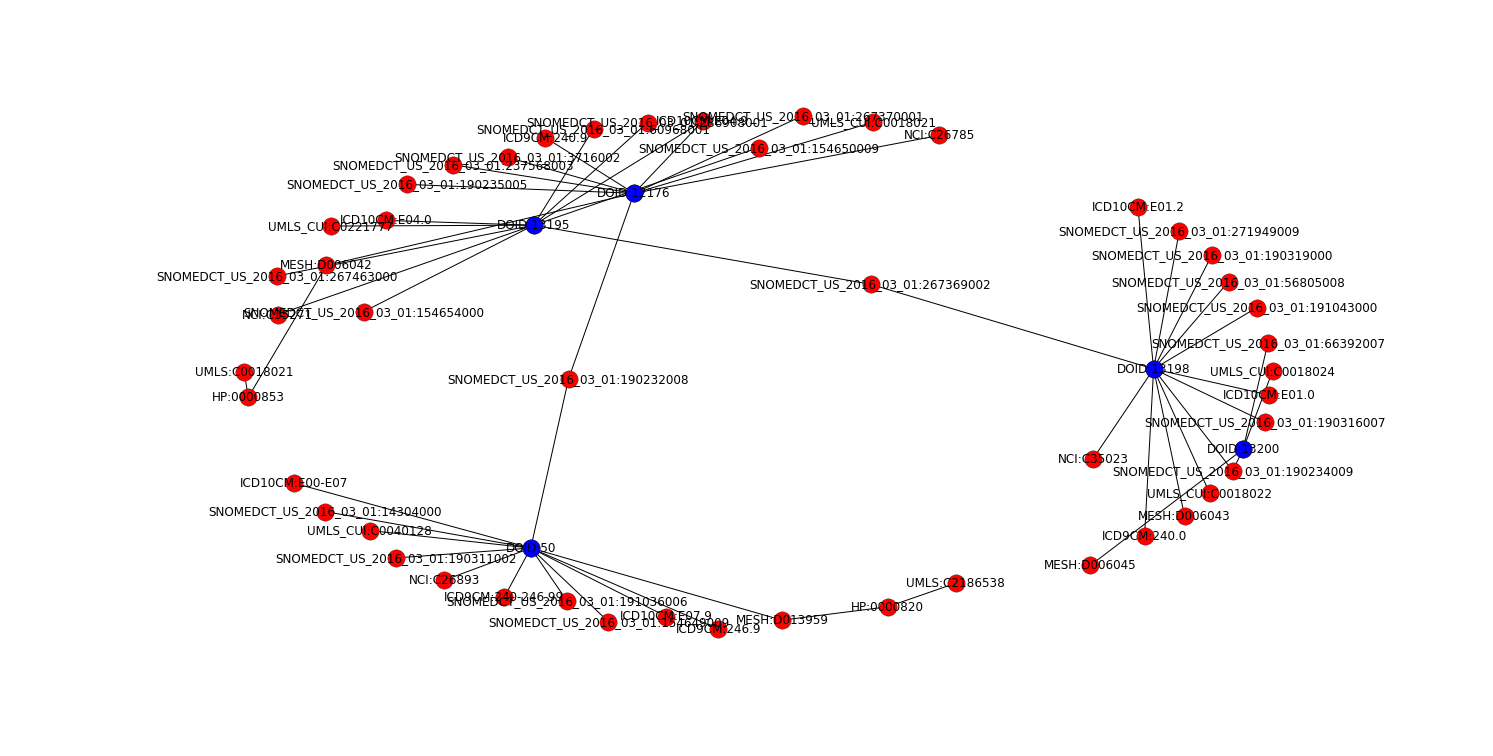

In [150]:
sg = [subgraph for subgraph in ccs if len([x for x in subgraph.nodes() if x.startswith("DOID:")])==5 and len(subgraph)>20][0]
plt.figure(figsize=(20,10))
pos = nx.layout.fruchterman_reingold_layout(sg)
nx.draw(sg, pos, with_labels=True)
do_ids = [x for x in sg.nodes() if x.startswith("DOID:")]
nx.draw_networkx_nodes(sg,pos,nodelist=do_ids,node_color='b')

In [167]:
# what nodes are connecting DOIDs?
from itertools import combinations, chain
all_paths = list(chain(*[list(nx.shortest_paths.all_shortest_paths(sg, c[0], c[1])) for c in combinations(do_ids, 2)]))
all_paths = [path for path in all_paths if len(path) == 3]
all_paths

[['DOID:13200', 'SNOMEDCT_US_2016_03_01:190234009', 'DOID:13198'],
 ['DOID:13198', 'SNOMEDCT_US_2016_03_01:267369002', 'DOID:13195'],
 ['DOID:50', 'SNOMEDCT_US_2016_03_01:190232008', 'DOID:12176'],
 ['DOID:13195', 'ICD10CM:E04.9', 'DOID:12176']]

In [168]:
all_paths = [path[1:-1] for path in all_paths]
Counter([x.split(":")[0] for x in chain(*all_paths)])


Counter({'ICD10CM': 1, 'SNOMEDCT_US_2016_03_01': 3})

In [177]:
d=[]
subgraphs = [subgraph for subgraph in ccs if 4<len([x for x in subgraph.nodes() if x.startswith("DOID:")])<20]
for sg in subgraphs:
    do_ids = [x for x in sg.nodes() if x.startswith("DOID:")]
    all_paths = list(chain(*[list(nx.shortest_paths.all_shortest_paths(sg, c[0], c[1])) for c in combinations(do_ids, 2)]))
    all_paths = [path for path in all_paths if len(path) == 3]
    all_paths = [path[1:-1] for path in all_paths]
    d.append(Counter([x.split(":")[0] for x in chain(*all_paths)]))


In [178]:
c=Counter()
for x in d:
    c.update(x)
c

Counter({'ICD10CM': 129,
         'ICD9CM': 14,
         'KEGG': 1,
         'MESH': 155,
         'NCI': 15,
         'OMIM': 17,
         'ORDO': 7,
         'SNOMEDCT_US_2016_03_01': 482,
         'UMLS_CUI': 14})